## Simple random and systematic sampling
#### Simple random sampling
The simplest method of sampling a population is the one you've seen already. It is known as simple random sampling (sometimes abbreviated to "SRS"), and involves picking rows at random, one at a time, where each row has the same chance of being picked as any other.

In this chapter, you'll apply sampling methods to a synthetic (fictional) employee attrition dataset from IBM, where "attrition" in this context means leaving the company.

attrition_pop is available; pandas as pd is loaded.

In [1]:
import pandas as pd
import numpy as np
attrition_pop = pd.read_feather("attrition.feather")
attrition_pop

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,21,0.0,Travel_Rarely,391,Research_Development,15,College,Life_Sciences,High,Male,...,Excellent,Very_High,0,0,6,Better,0,0,0,0
1,19,1.0,Travel_Rarely,528,Sales,22,Below_College,Marketing,Very_High,Male,...,Excellent,Very_High,0,0,2,Good,0,0,0,0
2,18,1.0,Travel_Rarely,230,Research_Development,3,Bachelor,Life_Sciences,High,Male,...,Excellent,High,0,0,2,Better,0,0,0,0
3,18,0.0,Travel_Rarely,812,Sales,10,Bachelor,Medical,Very_High,Female,...,Excellent,Low,0,0,2,Better,0,0,0,0
4,18,1.0,Travel_Frequently,1306,Sales,5,Bachelor,Marketing,Medium,Male,...,Excellent,Very_High,0,0,3,Better,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,55,0.0,Travel_Rarely,1117,Sales,18,Doctor,Life_Sciences,Low,Female,...,Outstanding,Very_High,0,37,2,Better,10,9,7,7
1466,58,0.0,Non-Travel,350,Sales,2,Bachelor,Medical,Medium,Male,...,Outstanding,Very_High,1,37,0,Good,16,9,14,14
1467,58,0.0,Travel_Rarely,682,Sales,10,Master,Medical,Very_High,Male,...,Excellent,High,0,38,1,Good,37,10,1,8
1468,58,1.0,Travel_Rarely,147,Research_Development,23,Master,Medical,Very_High,Female,...,Excellent,Very_High,1,40,3,Good,40,10,15,6


In [2]:
# Sample 70 rows using simple random sampling and set the seed
attrition_samp = attrition_pop.sample(n=70, random_state=18900217)

# Print the sample
print(attrition_samp)

      Age  Attrition     BusinessTravel  DailyRate            Department  \
1134   35        0.0      Travel_Rarely        583  Research_Development   
1150   52        0.0         Non-Travel        585                 Sales   
531    33        0.0      Travel_Rarely        931  Research_Development   
395    31        0.0      Travel_Rarely       1332  Research_Development   
392    29        0.0      Travel_Rarely        942  Research_Development   
...   ...        ...                ...        ...                   ...   
361    27        0.0  Travel_Frequently       1410                 Sales   
1180   36        0.0      Travel_Rarely        530                 Sales   
230    26        0.0      Travel_Rarely       1443                 Sales   
211    29        0.0  Travel_Frequently        410  Research_Development   
890    30        0.0  Travel_Frequently       1312  Research_Development   

      DistanceFromHome      Education    EducationField  \
1134                25      

Simply the best! Notice how the indexes in the sample aren't always in increasing order. They are just random.

#### Systematic sampling
One sampling method that avoids randomness is called systematic sampling. Here, you pick rows from the population at regular intervals.

For example, if the population dataset had one thousand rows, and you wanted a sample size of five, you could pick rows 0, 200, 400, 600, and 800.

attrition_pop is available; pandas has been pre-loaded as pd.

In [3]:
# Set the sample size to 70
sample_size = 70

# Calculate the population size from attrition_pop
pop_size = len(attrition_pop)

# Calculate the interval
interval = pop_size//sample_size

# print interval
print(interval)

21


In [4]:
# Systematically sample 70 rows
attrition_sys_samp = attrition_pop.iloc[::interval]

# Print the sample
print(attrition_sys_samp)

      Age  Attrition BusinessTravel  DailyRate            Department  \
0      21        0.0  Travel_Rarely        391  Research_Development   
21     19        0.0  Travel_Rarely       1181  Research_Development   
42     45        0.0  Travel_Rarely        252  Research_Development   
63     23        0.0  Travel_Rarely        373  Research_Development   
84     30        1.0  Travel_Rarely        945                 Sales   
...   ...        ...            ...        ...                   ...   
1365   48        0.0  Travel_Rarely        715  Research_Development   
1386   48        0.0  Travel_Rarely       1355  Research_Development   
1407   50        0.0  Travel_Rarely        989  Research_Development   
1428   50        0.0     Non-Travel        881  Research_Development   
1449   52        0.0  Travel_Rarely        699  Research_Development   

      DistanceFromHome      Education EducationField EnvironmentSatisfaction  \
0                   15        College  Life_Sciences   

Systematic success! Systematic sampling avoids randomness by picking rows at regular intervals.

#### Is systematic sampling OK?
Systematic sampling has a problem: if the data has been sorted, or there is some sort of pattern or meaning behind the row order, then the resulting sample may not be representative of the whole population. The problem can be solved by shuffling the rows, but then systematic sampling is equivalent to simple random sampling.

Here you'll look at how to determine whether or not there is a problem.

attrition_pop is available; pandas is loaded as pd, and matplotlib.pyplot as plt.

      index  Age  Attrition     BusinessTravel  DailyRate  \
0         0   21        0.0      Travel_Rarely        391   
1         1   19        1.0      Travel_Rarely        528   
2         2   18        1.0      Travel_Rarely        230   
3         3   18        0.0      Travel_Rarely        812   
4         4   18        1.0  Travel_Frequently       1306   
...     ...  ...        ...                ...        ...   
1465   1465   55        0.0      Travel_Rarely       1117   
1466   1466   58        0.0         Non-Travel        350   
1467   1467   58        0.0      Travel_Rarely        682   
1468   1468   58        1.0      Travel_Rarely        147   
1469   1469   58        1.0      Travel_Rarely        286   

                Department  DistanceFromHome      Education EducationField  \
0     Research_Development                15        College  Life_Sciences   
1                    Sales                22  Below_College      Marketing   
2     Research_Development       

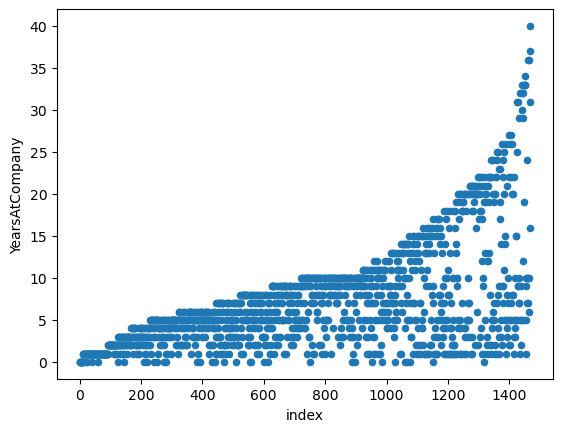

In [5]:
import matplotlib.pyplot as plt

# Add an index column to attrition_pop
attrition_pop_id = attrition_pop.reset_index()
print(attrition_pop_id,"\n\n")

# Plot YearsAtCompany vs. index for attrition_pop_id
attrition_pop_id.plot(x = 'index', y = 'YearsAtCompany', kind = 'scatter')
plt.show()

      index  Age  Attrition     BusinessTravel  DailyRate  \
0         0   31        0.0      Travel_Rarely        196   
1         1   36        0.0      Travel_Rarely        311   
2         2   34        0.0      Travel_Rarely       1153   
3         3   21        1.0      Travel_Rarely        156   
4         4   29        0.0  Travel_Frequently       1404   
...     ...  ...        ...                ...        ...   
1465   1465   27        0.0         Non-Travel        210   
1466   1466   29        0.0      Travel_Rarely        657   
1467   1467   27        0.0      Travel_Rarely       1354   
1468   1468   40        0.0      Travel_Rarely        448   
1469   1469   35        1.0      Travel_Rarely        763   

                Department  DistanceFromHome      Education    EducationField  \
0                    Sales                29         Master         Marketing   
1     Research_Development                 7       Bachelor     Life_Sciences   
2     Research_Developme

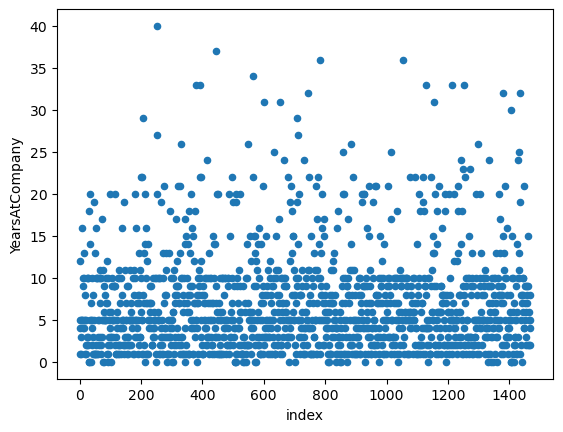

In [6]:
# Shuffle the rows of attrition_pop
attrition_shuffled = attrition_pop.sample(frac=1)

# Reset the row indexes and create an index column
attrition_shuffled = attrition_shuffled.reset_index(drop=True).reset_index()
print(attrition_shuffled,"\n\n")

# Plot YearsAtCompany vs. index for attrition_shuffled
attrition_shuffled.plot(x = 'index', y = 'YearsAtCompany', kind = 'scatter')
plt.show()

#### Question
Does a systematic sample always produce a sample similar to a simple random sample?<br>
<br>
a.Yes. All sampling (random or non-random) methods will lead us to similar results.<br>
b.Yes. We should always expect a representative sample for both systematic and simple random sampling.<br>
c.No. This only holds if a seed has been set for both processes.<br>
<strong>d.No. This is not true if the data is sorted in some way.</strong>

Your sample skills are ample! Systematic sampling has problems when the data are sorted or contain a pattern. Shuffling the rows makes it equivalent to simple random sampling.

#### Which Sampling Method?

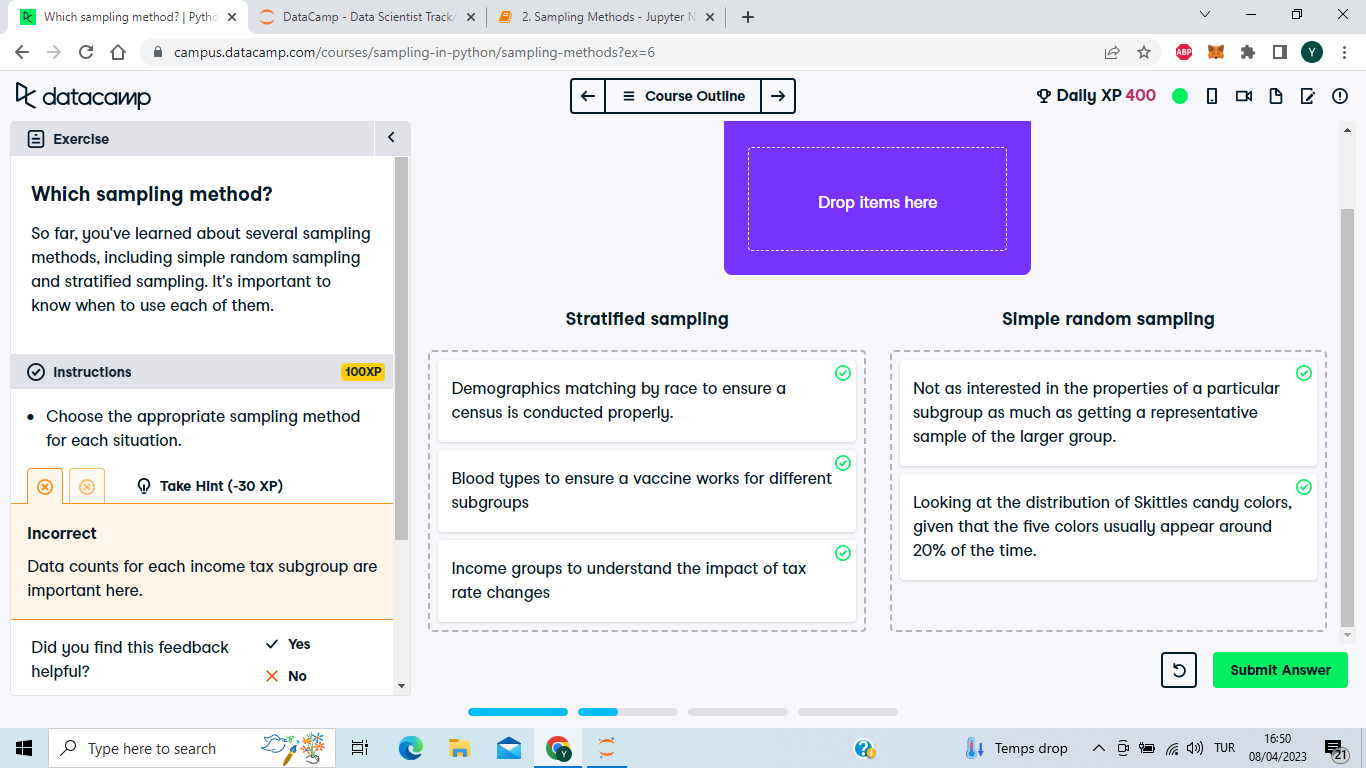

Classy classification! Stratified sampling is useful if you care about subgroups. Otherwise, simple random sampling is more appropriate.

#### Proportional stratified sampling
If you are interested in subgroups within the population, then you may need to carefully control the counts of each subgroup within the population. Proportional stratified sampling results in subgroup sizes within the sample that are representative of the subgroup sizes within the population. It is equivalent to performing a simple random sample on each subgroup.

attrition_pop is available; pandas is loaded with its usual alias.

In [7]:
# Proportion of employees by Education level
education_counts_pop = attrition_pop.Education.value_counts(normalize = True)

# Print education_counts_pop
print(education_counts_pop,"\n")
print(len(attrition_pop.Education))

Education
Bachelor         0.389116
Master           0.270748
College          0.191837
Below_College    0.115646
Doctor           0.032653
Name: proportion, dtype: float64 

1470


In [8]:
# Proportional stratified sampling for 40% of each Education group
attrition_strat = attrition_pop.groupby('Education', group_keys=False) \
    .apply(lambda x: x.sample(frac=0.4, random_state=2022))

# Print the sample
print(attrition_strat,"\n\n")

# Calculate the Education level proportions from attrition_strat
education_counts_strat = attrition_strat.Education.value_counts(normalize = True)

# Print education_counts_strat
print(education_counts_strat,"\n")

      Age  Attrition     BusinessTravel  DailyRate            Department  \
1191   53        0.0      Travel_Rarely        238                 Sales   
407    29        0.0  Travel_Frequently        995  Research_Development   
1233   59        0.0  Travel_Frequently       1225                 Sales   
366    37        0.0      Travel_Rarely        571  Research_Development   
702    31        0.0  Travel_Frequently        163  Research_Development   
...   ...        ...                ...        ...                   ...   
495    41        0.0      Travel_Rarely       1283  Research_Development   
1465   55        0.0      Travel_Rarely       1117                 Sales   
628    35        0.0  Travel_Frequently        853                 Sales   
627    44        0.0      Travel_Rarely       1488                 Sales   
1452   53        1.0      Travel_Rarely        607  Research_Development   

      DistanceFromHome      Education    EducationField  \
1191                 1  Belo

/var/folders/99/dtvgdtbj5x7g55qvsgpd_j780000gn/T/ipykernel_25897/1289144239.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  attrition_strat = attrition_pop.groupby('Education', group_keys=False) \


Perfectly proportioned! By grouping then sampling, the size of each group in the sample is representative of the size of the sample in the population.

#### Equal counts stratified sampling
If one subgroup is larger than another subgroup in the population, but you don't want to reflect that difference in your analysis, then you can use equal counts stratified sampling to generate samples where each subgroup has the same amount of data. For example, if you are analyzing blood types, O is the most common blood type worldwide, but you may wish to have equal amounts of O, A, B, and AB in your sample.

attrition_pop is available; pandas is loaded with its usual alias.

In [9]:
# Get 30 employees from each Education group
attrition_eq = attrition_pop.groupby('Education', group_keys=False) \
    .apply(lambda x: x.sample(n=30, random_state = 2022))

# Print the sample
print(attrition_eq)

      Age  Attrition     BusinessTravel  DailyRate            Department  \
1191   53        0.0      Travel_Rarely        238                 Sales   
407    29        0.0  Travel_Frequently        995  Research_Development   
1233   59        0.0  Travel_Frequently       1225                 Sales   
366    37        0.0      Travel_Rarely        571  Research_Development   
702    31        0.0  Travel_Frequently        163  Research_Development   
...   ...        ...                ...        ...                   ...   
177    29        0.0      Travel_Rarely        738  Research_Development   
149    27        0.0         Non-Travel       1277  Research_Development   
1144   36        1.0      Travel_Rarely       1456                 Sales   
1080   37        0.0         Non-Travel       1063  Research_Development   
873    39        0.0      Travel_Rarely       1387  Research_Development   

      DistanceFromHome      Education    EducationField  \
1191                 1  Belo

/var/folders/99/dtvgdtbj5x7g55qvsgpd_j780000gn/T/ipykernel_25897/3743639926.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  attrition_eq = attrition_pop.groupby('Education', group_keys=False) \


In [10]:
# Get the proportions from attrition_eq
education_counts_eq = attrition_eq.Education.value_counts(normalize = True)

# Print the results
print(education_counts_eq)

Education
Below_College    0.2
College          0.2
Bachelor         0.2
Master           0.2
Doctor           0.2
Name: proportion, dtype: float64


Elegant equal count creation! If you want each subgroup to have equal weight in your analysis, then equal counts stratified sampling is the appropriate technique.

#### Weighted sampling
Stratified sampling provides rules about the probability of picking rows from your dataset at the subgroup level. A generalization of this is weighted sampling, which lets you specify rules about the probability of picking rows at the row level. The probability of picking any given row is proportional to the weight value for that row.

attrition_pop is available; pandas, matplotlib.pyplot, and numpy are loaded with their usual aliases.

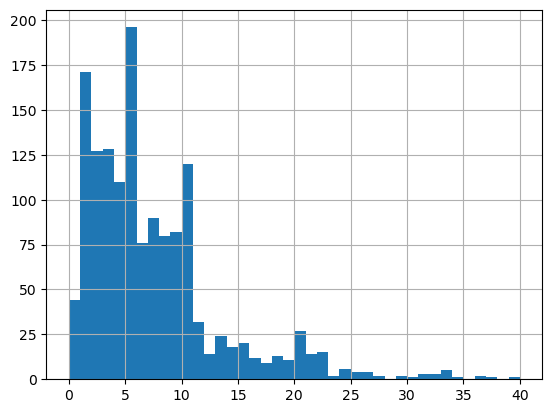

      Age  Attrition     BusinessTravel  DailyRate            Department  \
606    34        0.0  Travel_Frequently        653  Research_Development   
1119   49        0.0      Travel_Rarely        470  Research_Development   
1349   55        1.0      Travel_Rarely        267                 Sales   
813    30        0.0      Travel_Rarely        231                 Sales   
506    39        0.0      Travel_Rarely        492  Research_Development   
...   ...        ...                ...        ...                   ...   
1465   55        0.0      Travel_Rarely       1117                 Sales   
1121   51        0.0      Travel_Rarely       1469  Research_Development   
1377   52        0.0      Travel_Rarely       1053  Research_Development   
1135   34        0.0      Travel_Rarely        216                 Sales   
352    32        1.0         Non-Travel       1474                 Sales   

      DistanceFromHome Education    EducationField EnvironmentSatisfaction  \
606      

In [11]:
# Plot YearsAtCompany from attrition_pop as a histogram
attrition_pop.YearsAtCompany.hist(bins = np.arange(0, 41, 1))
plt.show()

# Sample 400 employees weighted by YearsAtCompany
attrition_weight = attrition_pop.sample(n = 400, weights = 'YearsAtCompany')

# Print the sample
print(attrition_weight)

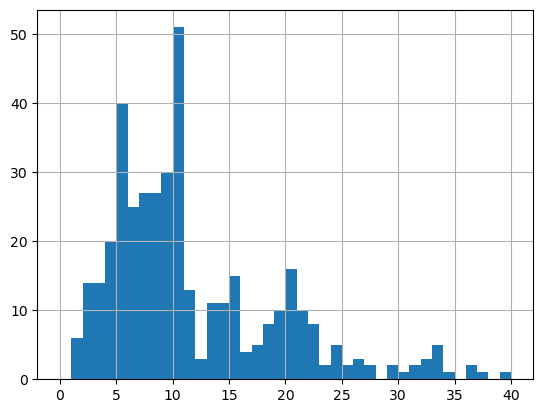

In [12]:
# Plot YearsAtCompany from attrition_weight as a histogram
attrition_weight.YearsAtCompany.hist(bins = np.arange(0, 41, 1))
plt.show()

#### Question
Which is higher? The mean YearsAtCompany from attrition_pop or the mean YearsAtCompany from attrition_weight?<br>
<br>
a.Population mean.<br>
b.Both means are identical.<br>
<strong>c.Sample mean.</strong><br>
d.It is impossible to calculate the two means.

In [13]:
print(attrition_pop.YearsAtCompany.mean())
print(attrition_weight.YearsAtCompany.mean())

7.0081632653061225
11.3075


Marvelous means! The weighted sample mean is around 11, which is higher than the population mean of around 7. The fact that the two numbers are different means that the weighted simple random sample is biased.

## Cluster sampling

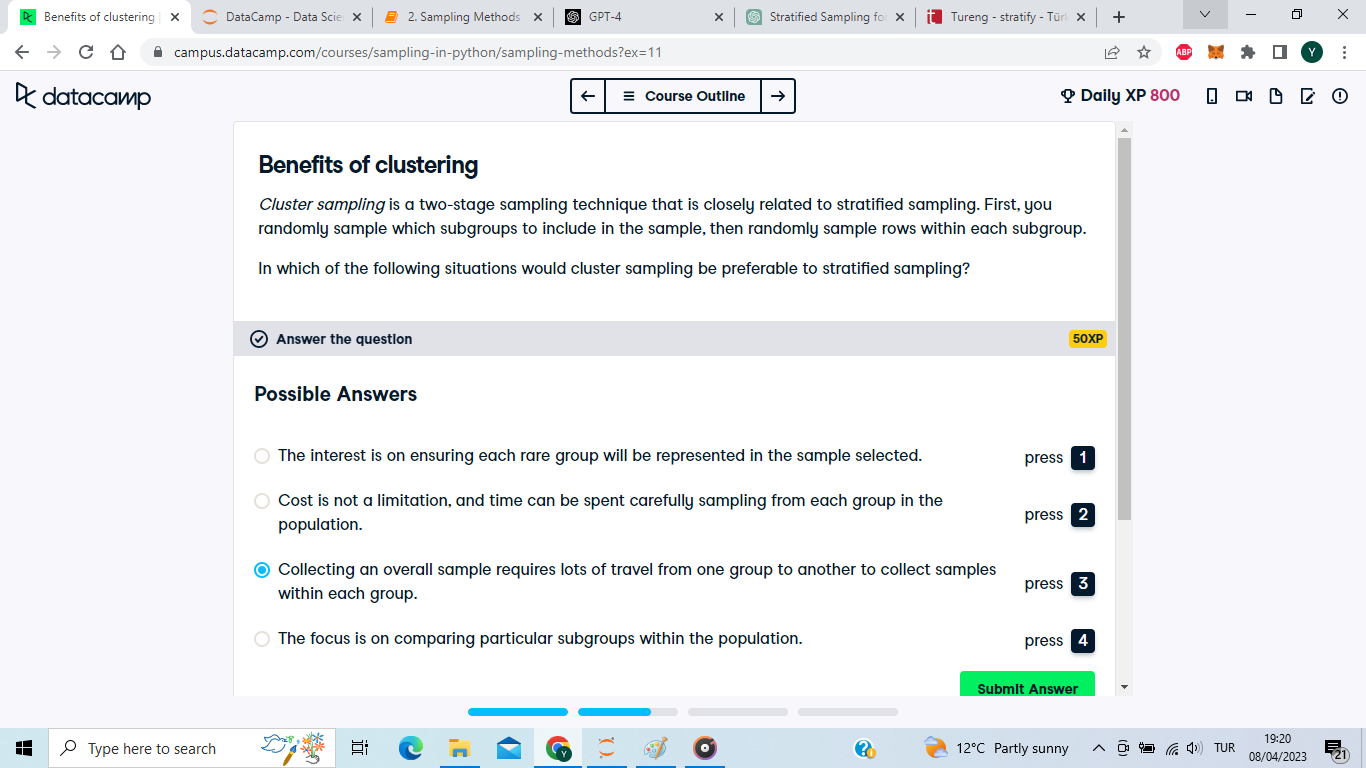

Delightful decision-making! The main benefit of cluster sampling over stratified sampling is that you can save time and money by not including every subgroup in your sample.

#### Performing cluster sampling
Now that you know when to use cluster sampling, it's time to put it into action. In this exercise, you'll explore the JobRole column of the attrition dataset. You can think of each job role as a subgroup of the whole population of employees.

attrition_pop is available; pandas is loaded with its usual alias, and the random package is available. A seed of 19790801 has also been set with random.seed().

In [14]:
import random

# Create a list of unique JobRole values
job_roles_pop = list(attrition_pop.JobRole.unique())

print(job_roles_pop, "\n\n")

# Randomly sample four JobRole values
job_roles_samp = random.sample(job_roles_pop, k = 4)

# Print the result
print(job_roles_samp)

['Research_Scientist', 'Sales_Representative', 'Laboratory_Technician', 'Human_Resources', 'Sales_Executive', 'Manufacturing_Director', 'Healthcare_Representative', 'Research_Director', 'Manager'] 


['Healthcare_Representative', 'Sales_Representative', 'Manufacturing_Director', 'Sales_Executive']


In [15]:
# Filter for rows where JobRole is in job_roles_samp
jobrole_condition = attrition_pop.JobRole.isin(job_roles_samp)
print(jobrole_condition, "\n\n")

attrition_filtered = attrition_pop[jobrole_condition]

# Print the result
print(attrition_filtered)

0       False
1        True
2       False
3        True
4        True
        ...  
1465    False
1466    False
1467     True
1468     True
1469    False
Name: JobRole, Length: 1470, dtype: bool 


      Age  Attrition     BusinessTravel  DailyRate            Department  \
1      19        1.0      Travel_Rarely        528                 Sales   
3      18        0.0      Travel_Rarely        812                 Sales   
4      18        1.0  Travel_Frequently       1306                 Sales   
9      18        1.0  Travel_Frequently        544                 Sales   
23     19        1.0  Travel_Frequently        602                 Sales   
...   ...        ...                ...        ...                   ...   
1454   53        0.0      Travel_Rarely        661                 Sales   
1458   56        0.0  Travel_Frequently        906                 Sales   
1463   56        0.0      Travel_Rarely       1400  Research_Development   
1467   58        0.0      Travel_Rarely   

In [16]:
# Remove categories with no rows
attrition_filtered.JobRole = attrition_filtered.JobRole.cat.remove_unused_categories()
print(attrition_filtered.JobRole, "\n\n")

# Randomly sample 10 employees from each sampled job role
attrition_clust = attrition_filtered.groupby("JobRole", group_keys=False) \
    .apply(lambda x: x.sample(n=10, random_state = 2022))

# Print the sample
print(attrition_clust)

1            Sales_Representative
3            Sales_Representative
4            Sales_Representative
9            Sales_Representative
23           Sales_Representative
                  ...            
1454              Sales_Executive
1458              Sales_Executive
1463       Manufacturing_Director
1467              Sales_Executive
1468    Healthcare_Representative
Name: JobRole, Length: 685, dtype: category
Categories (4, object): ['Healthcare_Representative', 'Manufacturing_Director', 'Sales_Executive', 'Sales_Representative'] 


      Age  Attrition     BusinessTravel  DailyRate            Department  \
812    31        0.0      Travel_Rarely        616  Research_Development   
1190   38        0.0      Travel_Rarely       1495  Research_Development   
378    33        0.0      Travel_Rarely       1069  Research_Development   
920    35        0.0  Travel_Frequently       1199  Research_Development   
917    33        0.0      Travel_Rarely        501  Research_Development   


/var/folders/99/dtvgdtbj5x7g55qvsgpd_j780000gn/T/ipykernel_25897/2240739318.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  attrition_filtered.JobRole = attrition_filtered.JobRole.cat.remove_unused_categories()
/var/folders/99/dtvgdtbj5x7g55qvsgpd_j780000gn/T/ipykernel_25897/2240739318.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  attrition_clust = attrition_filtered.groupby("JobRole", group_keys=False) \


Classy cluster sampling! The two-stage sampling technique gives you control over sampling both between subgroups and within subgroups.

## Comparing sampling methods
#### 3 kinds of sampling
You're going to compare the performance of point estimates using simple, stratified, and cluster sampling. Before doing that, you'll have to set up the samples.

You'll use the RelationshipSatisfaction column of the attrition_pop dataset, which categorizes the employee's relationship with the company. It has four levels: Low, Medium, High, and Very_High. pandas has been loaded with its usual alias, and the random package has been loaded.

In [17]:
# Perform simple random sampling to get 0.25 of the population
attrition_srs = attrition_pop.sample(frac = 0.25, random_state = 2022)
print(attrition_srs, "\n\n")


      Age  Attrition     BusinessTravel  DailyRate            Department  \
186    37        0.0      Travel_Rarely       1225  Research_Development   
743    34        0.0  Travel_Frequently       1069  Research_Development   
414    37        0.0  Travel_Frequently       1278                 Sales   
1383   44        0.0      Travel_Rarely       1199  Research_Development   
850    35        0.0  Travel_Frequently        200  Research_Development   
...   ...        ...                ...        ...                   ...   
194    22        1.0      Travel_Rarely        617  Research_Development   
659    27        0.0      Travel_Rarely        975  Research_Development   
873    39        0.0      Travel_Rarely       1387  Research_Development   
637    34        0.0      Travel_Rarely        629  Research_Development   
1056   37        0.0      Travel_Rarely        977  Research_Development   

      DistanceFromHome      Education EducationField EnvironmentSatisfaction  \
186    

In [18]:
# Perform stratified sampling to get 0.25 of each relationship group
attrition_strat = attrition_pop.groupby("RelationshipSatisfaction", group_keys = False) \
    .apply(lambda x: x.sample(frac = 0.25, random_state=2022))
print(attrition_strat)

      Age  Attrition BusinessTravel  DailyRate            Department  \
1381   45        1.0  Travel_Rarely       1449                 Sales   
1357   42        0.0  Travel_Rarely        300  Research_Development   
924    30        0.0  Travel_Rarely        288  Research_Development   
1224   46        0.0  Travel_Rarely       1003  Research_Development   
1277   48        0.0  Travel_Rarely       1236  Research_Development   
...   ...        ...            ...        ...                   ...   
111    34        0.0  Travel_Rarely       1320  Research_Development   
255    35        0.0  Travel_Rarely        195                 Sales   
656    27        0.0  Travel_Rarely        608  Research_Development   
375    24        0.0     Non-Travel       1269  Research_Development   
550    45        0.0  Travel_Rarely        192  Research_Development   

      DistanceFromHome      Education    EducationField  \
1381                 2       Bachelor         Marketing   
1357             

/var/folders/99/dtvgdtbj5x7g55qvsgpd_j780000gn/T/ipykernel_25897/1344910181.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  attrition_strat = attrition_pop.groupby("RelationshipSatisfaction", group_keys = False) \


In [19]:
# Create a list of unique RelationshipSatisfaction values
satisfaction_unique = list(attrition_pop.RelationshipSatisfaction.unique())

# Randomly sample 2 unique satisfaction values
satisfaction_samp = random.sample(satisfaction_unique, k = 2)

# Filter for satisfaction_samp and clear unused categories from RelationshipSatisfaction
satis_condition = attrition_pop.RelationshipSatisfaction \
    .isin(satisfaction_samp)
attrition_clust_prep = attrition_pop[satis_condition]
attrition_clust_prep['RelationshipSatisfaction'] = attrition_clust_prep['RelationshipSatisfaction'].cat.remove_unused_categories()

# Perform cluster sampling on the selected group, getting 0.25 of attrition_pop
attrition_clust = attrition_clust_prep.groupby('RelationshipSatisfaction', group_keys = False) \
    .apply(lambda x: x.sample(n = len(attrition_pop) // 4, random_state = 2022))

print(attrition_clust)

/var/folders/99/dtvgdtbj5x7g55qvsgpd_j780000gn/T/ipykernel_25897/3298099739.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  attrition_clust_prep['RelationshipSatisfaction'] = attrition_clust_prep['RelationshipSatisfaction'].cat.remove_unused_categories()
/var/folders/99/dtvgdtbj5x7g55qvsgpd_j780000gn/T/ipykernel_25897/3298099739.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  attrition_clust = attrition_clust_prep.groupby('RelationshipSatisfaction', group_keys = False) \


ValueError: Cannot take a larger sample than population when 'replace=False'

Terrific triple! Now we have the three samples set up, let's calculate some summary statistics

#### Comparing point estimates
Now that you have three types of sample (simple, stratified, and cluster), you can compare point estimates from each sample to the population parameter. That is, you can calculate the same summary statistic on each sample and see how it compares to the summary statistic for the population.

Here, we'll look at how satisfaction with the company affects whether or not the employee leaves the company. That is, you'll calculate the proportion of employees who left the company (they have an Attrition value of 1) for each value of RelationshipSatisfaction.

attrition_pop, attrition_srs, attrition_strat, and attrition_clust are available; pandas is loaded with its usual alias.

In [20]:
# Mean Attrition by RelationshipSatisfaction group
mean_attrition_pop = attrition_pop.groupby('RelationshipSatisfaction') \
    .Attrition.mean()

# Print the result
print(mean_attrition_pop)

RelationshipSatisfaction
Low          0.206522
Medium       0.148515
High         0.154684
Very_High    0.148148
Name: Attrition, dtype: float64


/var/folders/99/dtvgdtbj5x7g55qvsgpd_j780000gn/T/ipykernel_25897/1880283626.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_attrition_pop = attrition_pop.groupby('RelationshipSatisfaction') \


In [21]:
# Calculate the same thing for the simple random sample 
mean_attrition_srs = attrition_srs.groupby('RelationshipSatisfaction') \
    .Attrition.mean()

# Print the result
print(mean_attrition_srs)

RelationshipSatisfaction
Low          0.134328
Medium       0.164179
High         0.160000
Very_High    0.155963
Name: Attrition, dtype: float64


/var/folders/99/dtvgdtbj5x7g55qvsgpd_j780000gn/T/ipykernel_25897/1565424163.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_attrition_srs = attrition_srs.groupby('RelationshipSatisfaction') \


In [22]:
# Calculate the same thing for the stratified sample 
mean_attrition_strat = attrition_strat.groupby('RelationshipSatisfaction') \
    ["Attrition"].mean()

# Print the result
print(mean_attrition_strat)

RelationshipSatisfaction
Low          0.144928
Medium       0.105263
High         0.121739
Very_High    0.111111
Name: Attrition, dtype: float64


/var/folders/99/dtvgdtbj5x7g55qvsgpd_j780000gn/T/ipykernel_25897/2983227228.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_attrition_strat = attrition_strat.groupby('RelationshipSatisfaction') \


In [23]:
# Calculate the same thing for the cluster sample 
mean_attrition_clust = attrition_clust.groupby('RelationshipSatisfaction') \
    ['Attrition'].mean()

# Print the result
print(mean_attrition_clust)

RelationshipSatisfaction
Low          0.222222
Medium       0.600000
High         0.250000
Very_High    0.100000
Name: Attrition, dtype: float64


/var/folders/99/dtvgdtbj5x7g55qvsgpd_j780000gn/T/ipykernel_25897/3871375505.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_attrition_clust = attrition_clust.groupby('RelationshipSatisfaction') \


Super summary statistics! The numbers are all fairly similar, with the notable exception that cluster sampling only gives results for the clusters included in the sample.

In [69]:
mean_attrition_pop_copy = mean_attrition_pop
mean_attrition_pop_copy = pd.concat([mean_attrition_pop, mean_attrition_srs, mean_attrition_strat, mean_attrition_clust], axis = 1)
mean_attrition_pop_copy.columns = ['Original Attrition', 'Attrition SRS', 'Attrition Strat', 'Attrition Clust']

mean_attrition_pop_copy

,Original Attrition,Attrition SRS,Attrition Strat,Attrition Clust
RelationshipSatisfaction,,,,
Low,0.206522,0.134328,0.144928,0.222222
Medium,0.148515,0.164179,0.105263,0.600000
High,0.154684,0.160000,0.121739,0.250000
Very_High,0.148148,0.155963,0.111111,0.100000
